In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("9-email_classification_svm.csv")

In [3]:
df.head()
#0 => personal email
#1 => work email

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [6]:
df.isna().sum()

subject_formality_score      0
sender_relationship_score    0
email_type                   0
dtype: int64

<Axes: xlabel='subject_formality_score', ylabel='sender_relationship_score'>

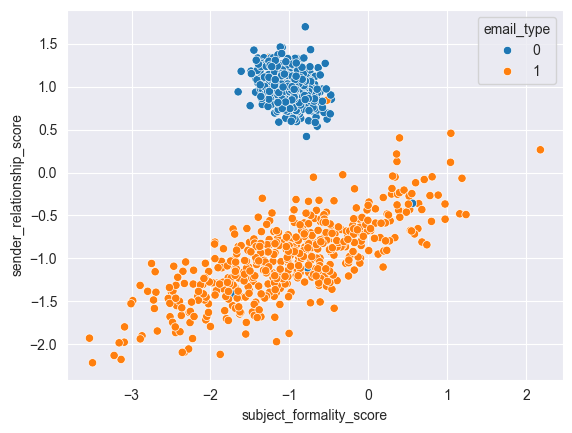

In [8]:
sns.scatterplot(x=df["subject_formality_score"], y=df["sender_relationship_score"],hue=df["email_type"])

In [10]:
df["email_type"].value_counts()

email_type
0    502
1    498
Name: count, dtype: int64

In [11]:
X = df.drop("email_type", axis=1)
y = df["email_type"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(kernel="linear")

In [15]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("classification_report\n",classification_report(y_pred,y_test))

confusion_matrix
 [[152   0]
 [  1 147]]
classification_report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       152
           1       1.00      0.99      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [28]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)


In [29]:
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))
print("classification_report\n",classification_report(y_pred,y_test))


confusion_matrix
 [[152   0]
 [  1 147]]
classification_report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       152
           1       1.00      0.99      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [30]:
df = pd.read_csv("9-loan_risk_svm.csv")

In [31]:
df.head()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1


<Axes: xlabel='credit_score_fluctuation', ylabel='recent_transaction_volume'>

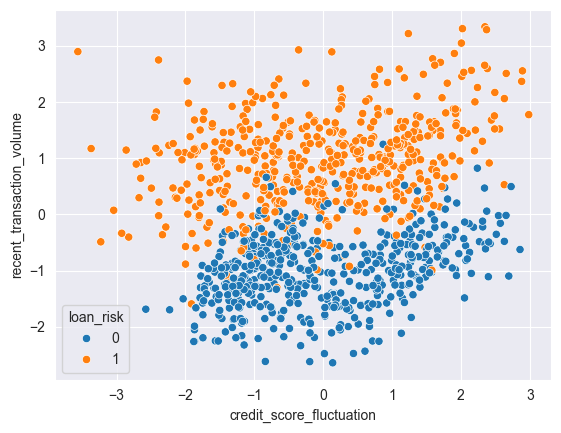

In [33]:
sns.scatterplot(x=df["credit_score_fluctuation"], y=df["recent_transaction_volume"],hue=df["loan_risk"])

In [39]:
X = df.drop("loan_risk", axis=1)
y = df["loan_risk"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [46]:
linear = SVC(kernel="linear")
linear.fit(X_train,y_train)
y_pred3 = linear.predict(X_test)
print("confusion_matrix\n",confusion_matrix(y_pred3,y_test))
print("classification_report\n",classification_report(y_pred3,y_test))

confusion_matrix
 [[109   9]
 [ 12 120]]
classification_report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       118
           1       0.93      0.91      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [47]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred4 = rbf.predict(X_test)
print("confusion_matrix\n",confusion_matrix(y_pred4,y_test))
print("classification_report\n",classification_report(y_pred4,y_test))

confusion_matrix
 [[113  11]
 [  8 118]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       124
           1       0.91      0.94      0.93       126

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [48]:
poly = SVC(kernel="poly")
poly.fit(X_train,y_train)
y_pred5 = poly.predict(X_test)
print("confusion_matrix\n",confusion_matrix(y_pred5,y_test))
print("classification_report\n",classification_report(y_pred5,y_test))

confusion_matrix
 [[107   8]
 [ 14 121]]
classification_report
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       115
           1       0.94      0.90      0.92       135

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [49]:
#hypermarameter tuning

In [50]:
param_grid = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C":[0.1,1,10,100],
    "gamma":["scale","auto"]
}

In [ ]:
dict

In [51]:
from sklearn.model_selection import GridSearchCV

In [1]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train,y_train)

NameError: name 'GridSearchCV' is not defined

In [53]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [54]:
y_pred6 = grid.predict(X_test)
print("confusion_matrix\n",confusion_matrix(y_pred6,y_test))
print("classification_report\n",classification_report(y_pred6,y_test))

confusion_matrix
 [[112  10]
 [  9 119]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       122
           1       0.92      0.93      0.93       128

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [64]:
df_seismic = pd.read_csv("9-seismic_activity_svm.csv")

In [65]:
df_seismic.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


In [66]:
df_seismic.describe()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
count,400.000000,4.000000e+02,400.000000
mean,0.000000,8.881784e-18,0.500000
std,7.719350,1.751650e+00,0.500626
min,-9.999954,-3.000000e+00,0.000000
25%,-6.134779,-1.500000e+00,0.000000
50%,0.000000,0.000000e+00,0.500000
75%,6.134779,1.500000e+00,1.000000
max,9.999954,3.000000e+00,1.000000


In [68]:
df_seismic["seismic_event_detected"].value_counts()

seismic_event_detected
0    200
1    200
Name: count, dtype: int64

<Axes: xlabel='underground_wave_energy', ylabel='vibration_axis_variation'>

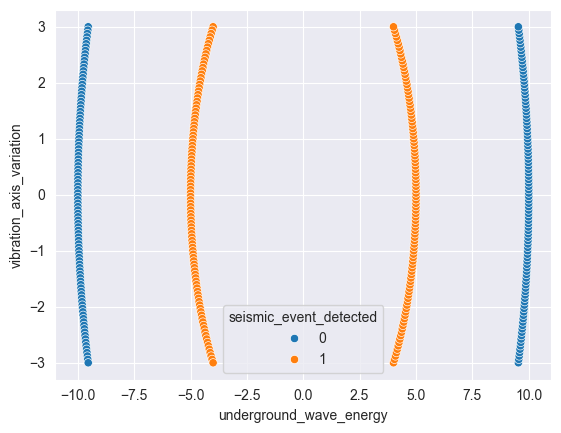

In [71]:
sns.scatterplot(x=df_seismic["underground_wave_energy"], y=df_seismic["vibration_axis_variation"],hue=df_seismic["seismic_event_detected"])

In [72]:
#manual rbf kernel

In [74]:
df_seismic.columns

Index(['underground_wave_energy', 'vibration_axis_variation',
       'seismic_event_detected'],
      dtype='object')

In [77]:
df_seismic["underground_wave_energy **2"] = df_seismic["underground_wave_energy"]**2
df_seismic["vibration_axis_variation **2"] = df_seismic["vibration_axis_variation"]**2
df_seismic["underground_wave_energy*vibration_axis_variation"] = df_seismic["underground_wave_energy"] * df_seismic["vibration_axis_variation"]

In [78]:
df_seismic.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
0,9.539392,-3.000000,0,91.000000,9.000000,-28.618176
1,9.558241,-2.939394,0,91.359963,8.640037,-28.095434
2,9.576669,-2.878788,0,91.712580,8.287420,-27.569197
3,9.594678,-2.818182,0,92.057851,7.942149,-27.039548
4,9.612272,-2.757576,0,92.395776,7.604224,-26.506569


In [79]:
X =df_seismic.drop("seismic_event_detected", axis=1)
y = df_seismic["seismic_event_detected"]

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [82]:
import plotly.express as px

In [85]:
fig = px.scatter_3d(df_seismic,x="underground_wave_energy **2",y="vibration_axis_variation **2",z="underground_wave_energy*vibration_axis_variation",color="seismic_event_detected")
fig.show()

In [86]:
linear = SVC(kernel="linear")
linear.fit(X_train,y_train)
y_pred7 = linear.predict(X_test)
print("confusion_matrix\n",confusion_matrix(y_pred7,y_test))
print("classification_report\n",classification_report(y_pred7,y_test))

confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [87]:
#automatic rbf

In [88]:
df_seismic = pd.read_csv("9-seismic_activity_svm.csv")

In [89]:
X =df_seismic.drop("seismic_event_detected", axis=1)
y = df_seismic["seismic_event_detected"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [91]:
linear = SVC(kernel="linear")
linear.fit(X_train,y_train)
y_pred8 = linear.predict(X_test)
print("confusion_matrix\n",confusion_matrix(y_pred8,y_test))
print("classification_report\n",classification_report(y_pred8,y_test))

confusion_matrix
 [[48 52]
 [ 0  0]]
classification_report
               precision    recall  f1-score   support

           0       1.00      0.48      0.65       100
           1       0.00      0.00      0.00         0

    accuracy                           0.48       100
   macro avg       0.50      0.24      0.32       100
weighted avg       1.00      0.48      0.65       100



C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [93]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred9 = rbf.predict(X_test)
print("confusion_matrix\n",confusion_matrix(y_pred9,y_test))
print("classification_report\n",classification_report(y_pred9,y_test))

confusion_matrix
 [[48  0]
 [ 0 52]]
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

